In [14]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV
)

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")


In [15]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset Shape:", X.shape)


Dataset Shape: (569, 30)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

kfold_scores = cross_val_score(
    rf, X_train, y_train,
    cv=kfold,
    scoring="accuracy"
)

print("K-Fold Accuracy Scores:", kfold_scores)
print("Mean Accuracy:", kfold_scores.mean())


K-Fold Accuracy Scores: [0.98837209 0.95294118 0.97647059 0.91764706 0.92941176]
Mean Accuracy: 0.95296853625171


In [18]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

skfold_scores = cross_val_score(
    rf, X_train, y_train,
    cv=skfold,
    scoring="accuracy"
)

print("Stratified K-Fold Accuracy Scores:", skfold_scores)
print("Mean Accuracy:", skfold_scores.mean())


Stratified K-Fold Accuracy Scores: [0.95348837 0.97647059 0.94117647 0.95294118 0.98823529]
Mean Accuracy: 0.9624623803009577


In [19]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

skfold_scores = cross_val_score(
    rf, X_train, y_train,
    cv=skfold,
    scoring="accuracy"
)

print("Stratified K-Fold Accuracy Scores:", skfold_scores)
print("Mean Accuracy:", skfold_scores.mean())


Stratified K-Fold Accuracy Scores: [0.95348837 0.97647059 0.94117647 0.95294118 0.98823529]
Mean Accuracy: 0.9624623803009577


In [20]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


In [21]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9600547195622434


In [22]:
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
svm = SVC(kernel="linear")
dt = DecisionTreeClassifier(random_state=42)

models = {
    "Random Forest": best_rf,
    "SVM": svm,
    "Decision Tree": dt
}


In [24]:
results = {}

for name, model in models.items():
    scores = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring="accuracy"
    )
    results[name] = scores.mean()

results_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["CV Accuracy"]
)

results_df


,CV Accuracy
Random Forest,0.960055
SVM,0.953023
Decision Tree,0.929685


In [25]:
evaluation = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluation.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

eval_df = pd.DataFrame(evaluation)
eval_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.958042,0.956522,0.977778,0.967033
1,SVM,0.951049,0.936842,0.988889,0.962162
2,Decision Tree,0.923077,0.954023,0.922222,0.937853


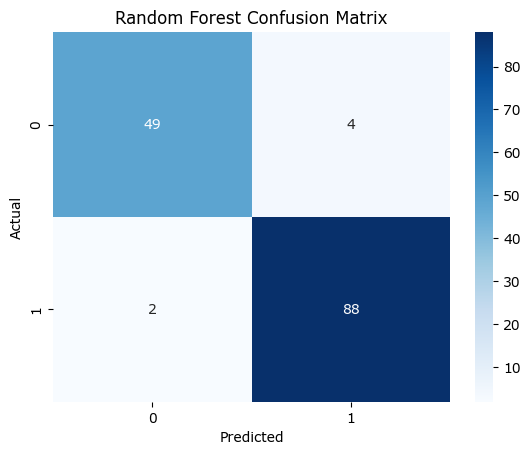

In [13]:
y_pred_rf = best_rf.predict(X_test)

sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
